# Preparation

In [2]:
from openTSNE import TSNE
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization
import numpy as np
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import utils
import seaborn as sns

In [3]:
# Fashion MNIST reader
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
x_train, y_train = load_mnist('data\\', kind='train')
x_test, y_test = load_mnist('data\\', kind='t10k')
print('Extraction completed!')

Extraction completed!


In [5]:
print("Data set contains %d samples with %d features" % x_train.shape)

Data set contains 60000 samples with 784 features


In [6]:

print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

60000 training samples
10000 test samples


In [44]:
tsne = TSNE(
    perplexity=100,
    metric="euclidean",
    n_jobs=8,
    ##theta = 0,   
)

In [42]:
time_start = time.time()
pca_50 = PCA(n_components=50)
x_train_pca = pca_50.fit_transform(x_train)
print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 3.9640908241271973 seconds
Cumulative variance explained by 50 principal components: 0.8626557709749154


In [43]:
time_start = time.time()
x_test_pca = pca_50.fit_transform(x_test)
print('PCA with 50 components for testing dataset done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components for testing dataset done! Time elapsed: 0.6409909725189209 seconds
Cumulative variance explained by 50 principal components: 0.8628847994680919


In [45]:
x_train_pca_subset = x_train_pca[0:60000]
y_train_subset = y_train[0:60000]
x_train_pca_subset.shape

(60000, 50)

In [46]:
%time embedding_train = tsne.fit(x_train_pca_subset)

Wall time: 2min 56s


In [47]:
import utils
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
board = []
for i in range(10):
    board.append([])
    for j in range(2):
        board[i].append(0)

In [19]:
board

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]]

In [16]:
# Utility function to visualize the outputs of PCA and t-SNE

label= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def fashion_scatter(x, colors, word = False):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = plt.scatter(x[:,0], x[:,1], lw=0, s=80, c=palette[colors.astype(np.int)],facecolors='none', edgecolors='r')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        #xtext, ytext= np.median(x[colors == i, :], axis=0)
        xtext, ytext= np.median(x[colors == i, :], axis=0)
        if (word):
            txt = ax.text(xtext, ytext, label[i], fontsize=24)
        else:
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        board[i][0] = xtext
        board[i][1] = ytext

    return f, ax, sc, txts

# Saving Centers

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(34.602938386007935, -32.018802276481836, 'T-shirt/top'),
  Text(-21.888947265594673, -52.22231925432335, 'Trouser'),
  Text(31.357285148384126, 17.650713559933017, 'Pullover'),
  Text(7.561759617792216, -31.431213581160577, 'Dress'),
  Text(40.68535695158999, 9.025607424993247, 'Coat'),
  Text(-31.108481957991966, 10.092240159123651, 'Sandal'),
  Text(23.73589716851162, 6.086575485089347, 'Shirt'),
  Text(-52.816062508018334, -7.429012738226639, 'Sneaker'),
  Text(-4.418015660214252, 21.85001632478962, 'Bag'),
  Text(-35.89183580338918, 44.9342102360193, 'Ankle boot')])

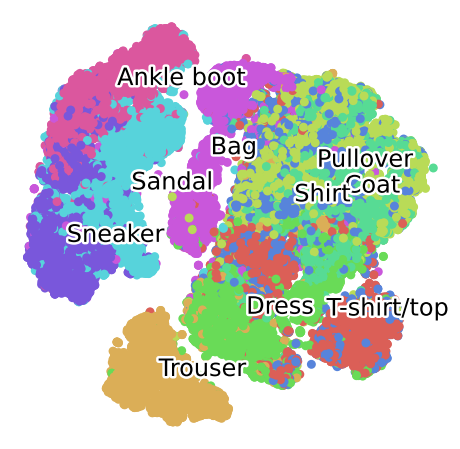

In [15]:
fashion_scatter(embedding_train, y_train_subset, word = True)

In [16]:
board

[[34.602938386007935, -32.018802276481836],
 [-21.888947265594673, -52.22231925432335],
 [31.357285148384126, 17.650713559933017],
 [7.561759617792216, -31.431213581160577],
 [40.68535695158999, 9.025607424993247],
 [-31.108481957991966, 10.092240159123651],
 [23.73589716851162, 6.086575485089347],
 [-52.816062508018334, -7.429012738226639],
 [-4.418015660214252, 21.85001632478962],
 [-35.89183580338918, 44.9342102360193]]

# Embedding new data points & Optimization

In [7]:
%%time
affinities_train = affinity.PerplexityBasedNN(
    x_train,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 33.41 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.62 seconds
Wall time: 35 s


In [8]:
%time init_train = initialization.pca(x_train, random_state=42)

Wall time: 2.12 s


In [9]:
embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    verbose=True,
)

In [10]:
%time embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)

===> Running optimization with exaggeration=12.00, lr=5000.00 for 250 iterations...
Iteration   50, KL divergence 6.1138, 50 iterations in 5.8700 sec
Iteration  100, KL divergence 5.5952, 50 iterations in 5.8100 sec
Iteration  150, KL divergence 5.4639, 50 iterations in 5.6040 sec
Iteration  200, KL divergence 5.4022, 50 iterations in 5.6050 sec
Iteration  250, KL divergence 5.3673, 50 iterations in 5.6126 sec
   --> Time elapsed: 28.50 seconds
Wall time: 28.6 s


In [11]:
embedding_train_1.shape

(60000, 2)

In [12]:
%time embedding_train_2 = embedding_train_1.optimize(n_iter=500, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=5000.00 for 500 iterations...
Iteration   50, KL divergence 4.0091, 50 iterations in 5.5190 sec
Iteration  100, KL divergence 3.4823, 50 iterations in 5.4825 sec
Iteration  150, KL divergence 3.2082, 50 iterations in 6.6420 sec
Iteration  200, KL divergence 3.0354, 50 iterations in 7.5365 sec
Iteration  250, KL divergence 2.9157, 50 iterations in 8.8274 sec
Iteration  300, KL divergence 2.8294, 50 iterations in 10.5610 sec
Iteration  350, KL divergence 2.7636, 50 iterations in 11.1150 sec
Iteration  400, KL divergence 2.7136, 50 iterations in 13.5690 sec
Iteration  450, KL divergence 2.6729, 50 iterations in 16.6860 sec
Iteration  500, KL divergence 2.6401, 50 iterations in 15.7600 sec
   --> Time elapsed: 101.70 seconds
Wall time: 1min 42s


In [13]:
%%time
embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 2.38 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
Wall time: 2.44 s


In [14]:
embedding_test.shape

(10000, 2)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(33.20726903680857, -41.00422089426159, '0'),
  Text(-23.861102703971973, -58.85309006190019, '1'),
  Text(36.729630164461305, 19.089565027511025, '2'),
  Text(2.735915193736332, -30.756552913297067, '3'),
  Text(46.75925189308475, 5.9951771324338505, '4'),
  Text(-31.683644498942535, 9.489202262021365, '5'),
  Text(29.882657390565132, 6.138972392850474, '6'),
  Text(-57.25283788753726, -10.705654908920934, '7'),
  Text(-1.4718694295956993, 36.456087014481554, '8'),
  Text(-41.18563629663433, 49.57979537913688, '9')])

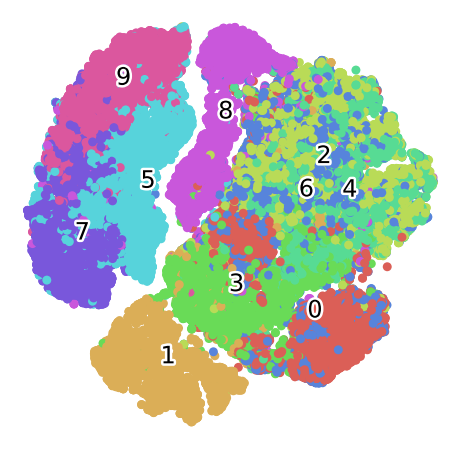

In [22]:
fashion_scatter(embedding_train_2,y_train)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(34.11681439367995, -41.610052548613986, '0'),
  Text(-24.230660292927727, -57.59335781121321, '1'),
  Text(36.03887404744292, 18.90388319055061, '2'),
  Text(3.0831954621942392, -31.158910154625246, '3'),
  Text(47.27458767033892, 7.660716554992289, '4'),
  Text(-31.39245395685343, 12.070305459593527, '5'),
  Text(29.812912053137104, 6.284569797137961, '6'),
  Text(-57.2528135302866, -11.73067785234091, '7'),
  Text(-1.679871253092283, 35.196420620724794, '8'),
  Text(-42.979538390035955, 49.44893623452929, '9')])

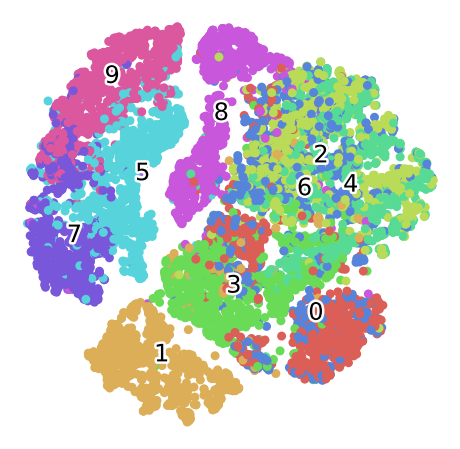

In [23]:
fashion_scatter(embedding_test, y_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100, metric="euclidean")
classifier.fit(embedding_train_2, y_train)
y_pred = classifier.predict(embedding_test)

In [25]:
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=uint8)

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[817   1  15  46  11   0 101   1   8   0]
 [  9 931  12  37   4   0   6   0   1   0]
 [ 13   2 682  15 150   0 133   0   5   0]
 [ 43   5  11 820  80   0  40   0   1   0]
 [  5   0 155  44 648   0 142   0   6   0]
 [  1   0   0   4   0 803   0 113   6  73]
 [207   2 173  35 103   0 462   0  18   0]
 [  0   0   0   0   0  18   0 906   0  76]
 [  5   1  19   5   9   4  18   6 931   2]
 [  0   0   0   0   0  14   1  42   0 943]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1000
           1       0.99      0.93      0.96      1000
           2       0.64      0.68      0.66      1000
           3       0.82      0.82      0.82      1000
           4       0.64      0.65      0.65      1000
           5       0.96      0.80      0.87      1000
           6       0.51      0.46      0.49      1000
           7       0.85      0.91      0.88      1000
           8       0.95      0.93      0.

Confusion matrix:
[[817   1  15  46  11   0 101   1   8   0]
 [  9 931  12  37   4   0   6   0   1   0]
 [ 13   2 682  15 150   0 133   0   5   0]
 [ 43   5  11 820  80   0  40   0   1   0]
 [  5   0 155  44 648   0 142   0   6   0]
 [  1   0   0   4   0 803   0 113   6  73]
 [207   2 173  35 103   0 462   0  18   0]
 [  0   0   0   0   0  18   0 906   0  76]
 [  5   1  19   5   9   4  18   6 931   2]
 [  0   0   0   0   0  14   1  42   0 943]]


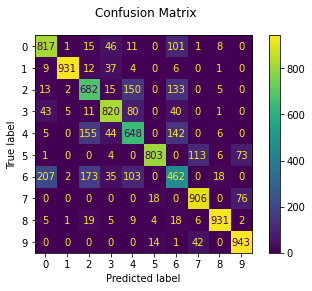

In [28]:
import sklearn
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [29]:
import pandas as pd
from random import randrange
result_df = pd.DataFrame(columns = ['No_of_points', 'Time_TSNE', 'Accuracy'])
print(result_df)

Empty DataFrame
Columns: [No_of_points, Time_TSNE, Accuracy]
Index: []


In [33]:
for i in range(1000):
    if i % 100 == 0:
        print(i)
    number_of_points = randrange(10000)
    # print(randrange(10000))
    time_start = time.time()
    classifier.fit(embedding_train_2, y_train) 
    y_pred = classifier.predict(embedding_test[0:number_of_points])
    time_end = time.time()-time_start
    result2 = accuracy_score(y_test[0:number_of_points],y_pred)
    result_df = result_df.append({'No_of_points' : number_of_points, 'Time' : time_end, 'Accuracy': result2}, 
                ignore_index = True)

0
100
200
300
400
500
600
700
800
900


In [36]:
df_filter = result_df[result_df['Accuracy'] < 1]

# To see the plot more clearly since in smaller amount, sometimes knn could get them all right, thus skew the graph 

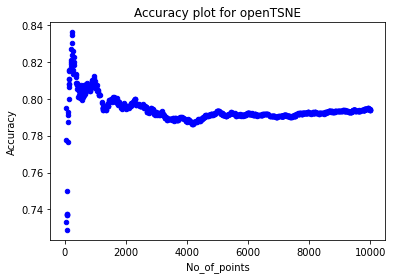

In [37]:

# scatter plot
df_filter.plot(kind = 'scatter',
        x = 'No_of_points',
        y = 'Accuracy',
        color = 'blue')
  
# set the title
plt.title('Accuracy plot for openTSNE')
  
# show the plot
plt.show()

# Testing Prediction

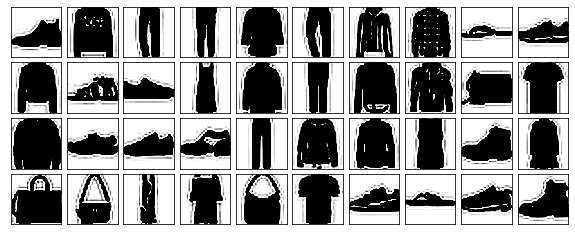

In [38]:
def plot_clothes(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='lanczos',
                  clim=(0, 16))
plot_clothes(x_test)

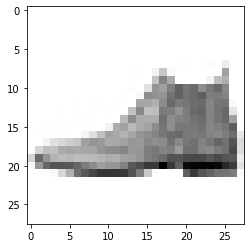

In [39]:
B = np.reshape(x_test[0], (-1, 28))
plt.imshow(B, cmap='Greys')
#plt.imshow(B)

In [40]:
B.shape

(28, 28)

In [48]:
test_arr = x_test_pca[0:1]
test_arr.shape
label_arr = y_test[0:1]

In [49]:
label_arr

array([9], dtype=uint8)

In [50]:
%time embedding_test = embedding_train.transform(test_arr, perplexity=100)

Wall time: 17.3 s


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(33.27112472970632, -30.84832527442775, '0'),
  Text(-23.283564273454104, -51.04686843254639, '1'),
  Text(30.311259502863983, 18.76963072610917, '2'),
  Text(6.072388057088139, -30.37314639987205, '3'),
  Text(39.24256524340932, 10.087456946613631, '4'),
  Text(-32.43905907721849, 11.123265585278059, '5'),
  Text(22.202719908133297, 7.242657578778704, '6'),
  Text(-54.09221654237017, -6.301614719584306, '7'),
  Text(-5.79557269496104, 23.271558330678257, '8'),
  Text(-37.48519425156499, 46.09334778702541, '9')])

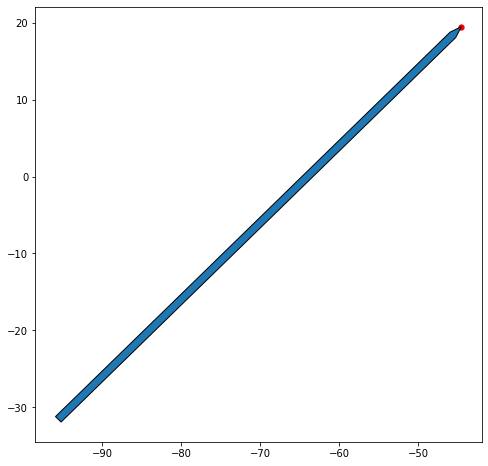

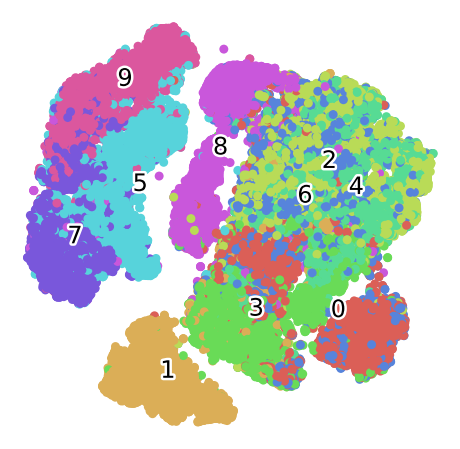

In [53]:
f = plt.figure(figsize=(8, 8))
# Increasing head_width of
# the arrow by setting
# head_width parameter
plt.arrow(embedding_test[0][0] - 51, embedding_test[0][1] - 51, 50, 50, head_width = 1, width = 1)
palette = np.array(sns.color_palette("hls", 10))
plt.scatter(embedding_test[:,0], embedding_test[:,1], lw=0, s=40, c = 'red')
#plt.scatter(embedding_train[:,0], embedding_train[:,1], lw=0, s=40, c=palette[y_train_subset.astype(np.int)])
fashion_scatter(embedding_train, y_train_subset)
#plt.scatter(embedding_train[:,0], embedding_train[:,1], lw=0, s=40, c=palette[y_train_subset.astype(np.int)])

In [54]:
def find_nearest_cluster_mean(points, means):
    cur_dist = 0
    index = 0
    i = 0
    for mean in means:
        #print(mean[0])
        #print(mean[1])
        tempSqr = (points[0] - mean[0]) ** 2 + (points[1] - mean[1]) ** 2
        #print('temp',tempSqr)
        if i == 0:
            cur_dist = tempSqr
        else:
            if tempSqr < cur_dist:
                #print('current smallest distance is ', cur_dist)
                #print('Belong to index', index)
                cur_dist = tempSqr
                index = i
                #print('Update to index: ', index)
                #print('New smallest distance is ', cur_dist)
        i= i+1
    return index

    
        


In [55]:
def print_where(test_point):
    f = plt.figure(figsize=(8, 8))
    plt.arrow(test_point[0][0] - 51, test_point[0][1] - 51, 50, 50, head_width = 1, width = 1)
    palette = np.array(sns.color_palette("hls", 10))
    plt.scatter(test_point[:,0], test_point[:,1], lw=0, s=40, c = 'red')
    plt.scatter(embedding_train[:,0], embedding_train[:,1], lw=0, s=40, c=palette[y_train_subset.astype(np.int)])

# Simple prediction using K-means

In [56]:
def find_single_point(index):
    B = np.reshape(x_test[index], (-1, 28))
    plt.imshow(B, cmap='Greys')
    single_test = x_test_pca[index:index+1]
    #print(single_test.shape)
    single_label = y_test[index:index+1]

    embedding_single = embedding_train.transform(single_test, perplexity=50)
    print_where(embedding_single)
    #print(embedding_single)
    print('Prediction is: ', label[find_nearest_cluster_mean(embedding_single[0], board)])
    print('Correct label is: ', label[y_test[index]])
    

Prediction is:  Dress
Correct label is:  Dress


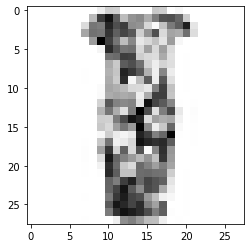

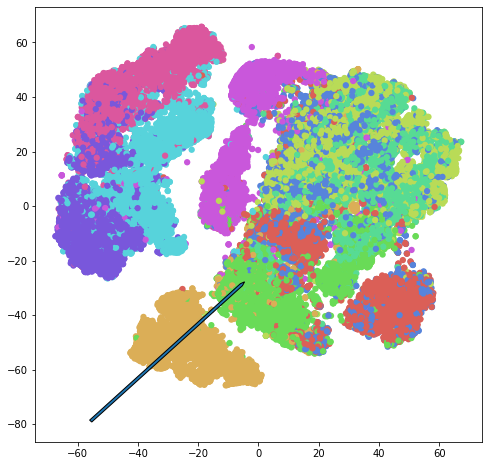

In [57]:
find_single_point(100)

Prediction is:  Sandal
Correct label is:  Bag


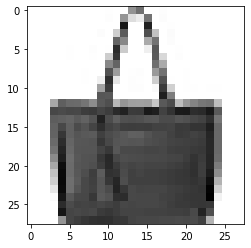

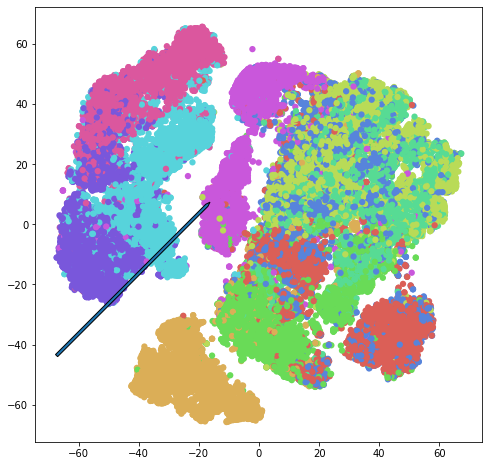

In [58]:
find_single_point(900)

Prediction is:  Trouser
Correct label is:  Trouser


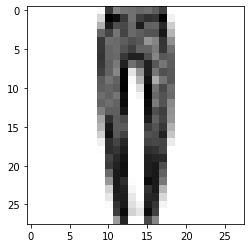

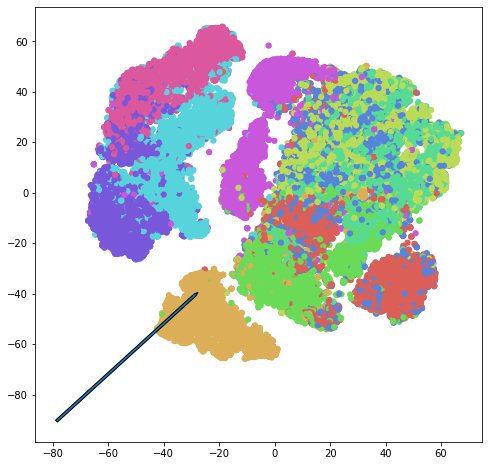

In [59]:
find_single_point(897)

Prediction is:  Coat
Correct label is:  Coat


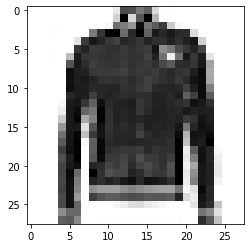

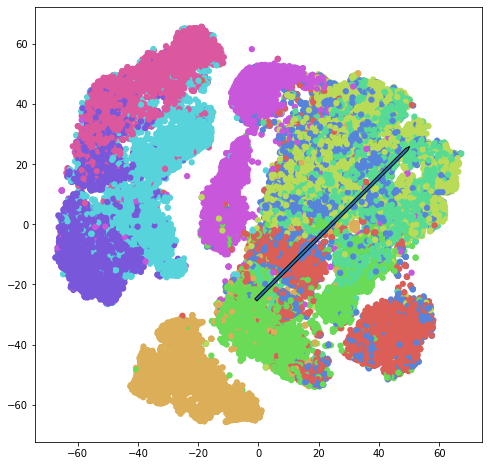

In [60]:
find_single_point(9765)

Prediction is:  T-shirt/top
Correct label is:  T-shirt/top


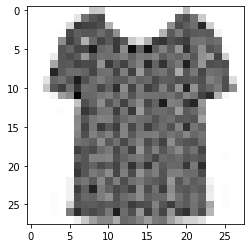

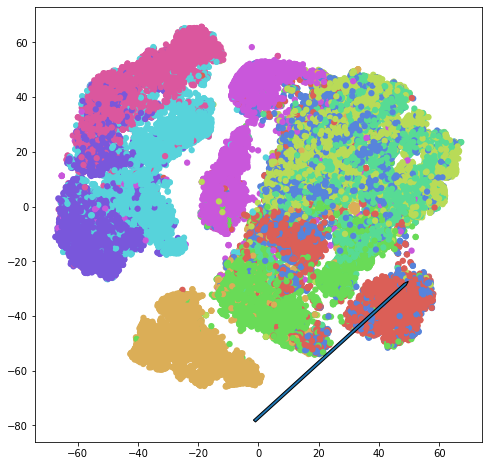

In [61]:
find_single_point(1000)

Prediction is:  Dress
Correct label is:  Dress


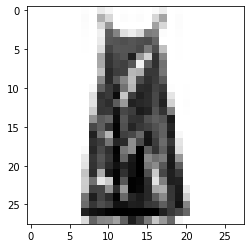

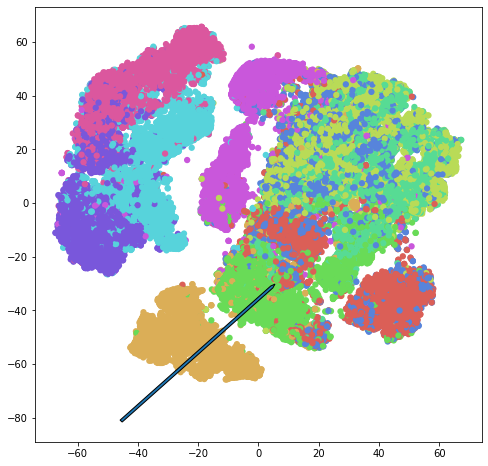

In [62]:
find_single_point(450)